In [19]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:

# Load the dataset
linkedin_connections_path = 'Connections.csv'
linkedin_df = pd.read_csv(linkedin_connections_path, header=3)
linkedin_df.columns = ['First Name', 'Last Name', 'URL', 'Email Address', 'Company', 'Position', 'Connected On']

# Convert 'Connected On' to datetime format and handle missing values
linkedin_df['Connected On'] = pd.to_datetime(linkedin_df['Connected On'], errors='coerce')
linkedin_df['Position'].fillna('', inplace=True)


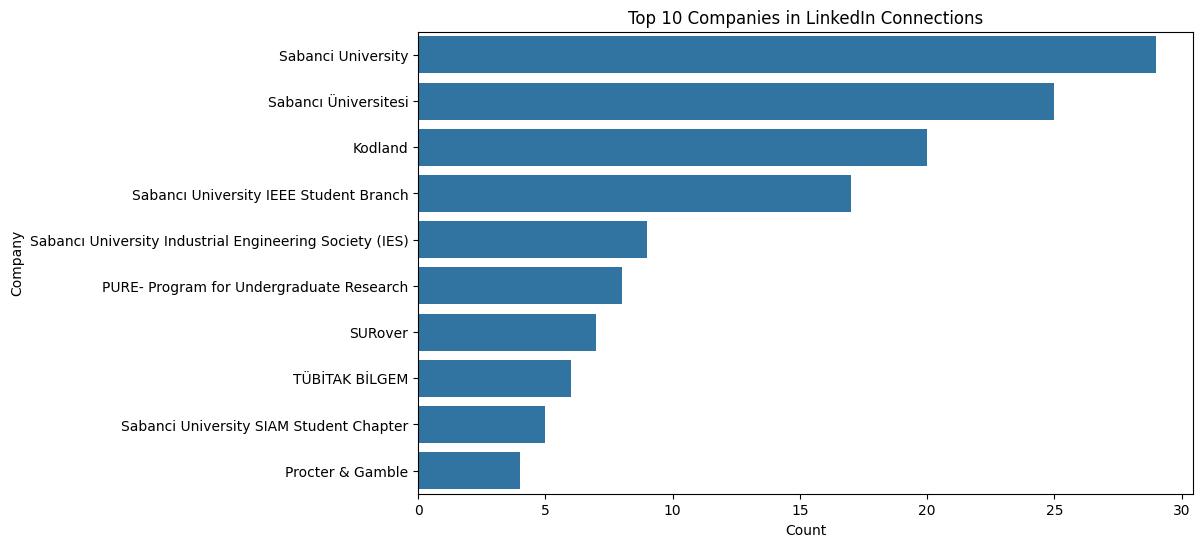

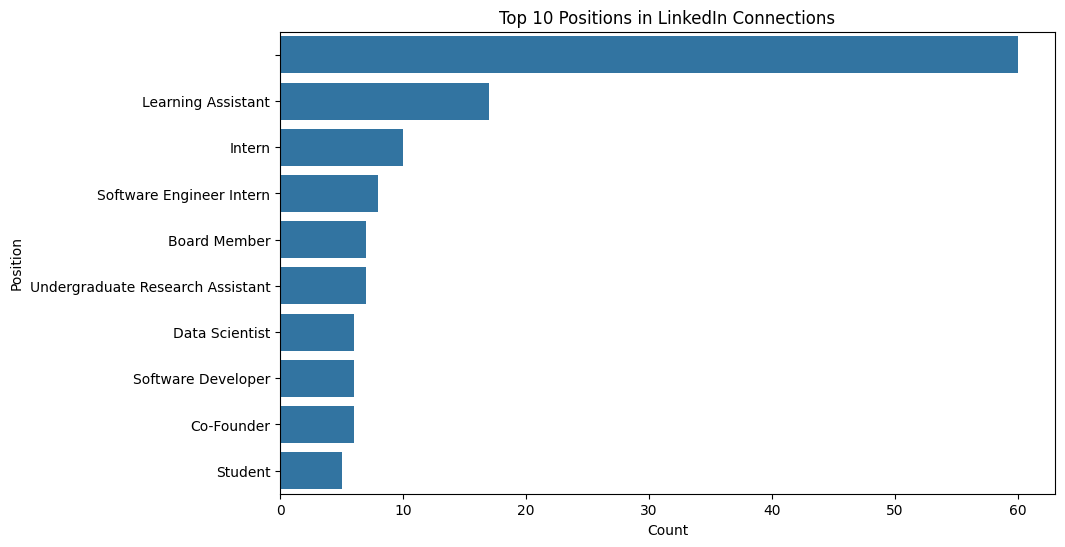

In [21]:

# Visualizations of the LinkedIn Data
# Distribution of Companies
plt.figure(figsize=(10, 6))
sns.countplot(y='Company', data=linkedin_df, order=linkedin_df['Company'].value_counts().index[:10])
plt.title('Top 10 Companies in LinkedIn Connections')
plt.ylabel('Company')
plt.xlabel('Count')
plt.show()

# Distribution of Positions
plt.figure(figsize=(10, 6))
sns.countplot(y='Position', data=linkedin_df, order=linkedin_df['Position'].value_counts().index[:10])
plt.title('Top 10 Positions in LinkedIn Connections')
plt.ylabel('Position')
plt.xlabel('Count')
plt.show()


In [31]:

# Sector categorization logic with error handling
#print(linkedin_df['Position'].unique())
def categorize_sector(position):
    position = position.lower() if isinstance(position, str) else ''
    if any(keyword in position for keyword in ['software', 'it', 'network', 'developer','mühendis','bilgisayar']):
        return 'Technology'
    elif any(keyword in position for keyword in ['finance', 'banking', 'account']):
        return 'Finance'
    elif any(keyword in position for keyword in ['medic', 'doctor', 'health', 'nurse']):
        return 'Healthcare'
    elif any(keyword in position for keyword in ['assistance', 'instructor', 'academic', 'school', 'teaching']):
        return 'Academia'
    elif any(keyword in position for keyword in ['manager', 'lead', 'owner', 'founder', 'co-founder']):
        return 'Manager'
    elif any(keyword in position for keyword in ['intern']):
        return 'Intern'

# Apply the categorization
linkedin_df['Sector'] = linkedin_df['Position'].apply(categorize_sector)

# Determine the most common sector
most_common_sector = linkedin_df['Sector'].value_counts().idxmax()

# Generate a fortune based on the most common sector
sector_fortunes = {
    'Technology': "Your path is illuminated with innovations in technology.",
    'Finance': "Financial acumen will be your key to success.",
    'Healthcare': "A future in healthcare promises to be rewarding.",
    'Academia': "You could excel as an academician with your skills and passion for learning!",
    'Manager' : "You will make a great leader, consider exploring opportunities in management or entrepreneurship!",
    'Intern' : "Embrace your internship as a stepping stone towards building valuable skills and enhancing your career opportunities!",
}

fortune = sector_fortunes.get(most_common_sector, "A bright future awaits in many possible paths.")

# Display the fortune
print("Your LinkedIn connections suggest:", fortune)

Your LinkedIn connections suggest: Your path is illuminated with innovations in technology.
